In [1]:
import sys
sys.path.insert(0, '../utils')

from dataPiping import *
from datetime import datetime as dt, timedelta

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_pickle('../../data/sessionDF.pkl')

In [3]:
df.startTime.min()

'2015-01-01T00:00:30'

In [4]:
df.isnull().sum()

customerId             0
sessionId              0
startTime              0
startUserTime          0
sessionLength          0
numberdivisions        0
avgPrice               0
viewonly               0
changeThumbnail        0
imageZoom              0
watchVideo             0
view360                0
sizeGuide              0
device             22984
dtype: int64

In [5]:
df[['numberdivisions','viewonly','changeThumbnail','imageZoom','watchVideo','view360','sizeGuide']].sum()

numberdivisions     3540789
viewonly           27721327
changeThumbnail    19622938
imageZoom           1555450
watchVideo          1068397
view360               32267
sizeGuide                 0
dtype: int64

In [8]:
df.startTime = df.startTime.apply(makeunixtime)

In [6]:
df.startTime = pd.DatetimeIndex(df.startTime.apply(makeunixtime))

KeyboardInterrupt: 

In [8]:
df.startUserTime = df.startUserTime.apply(makeunixtime)

In [12]:
df['startUserTimeD'] = df.startUserTime * 1000000000
df['startUserTimeD'] = pd.DatetimeIndex(df.startUserTimeD)
df['startTimeD'] = df.startTime * 1000000000
df['startTimeD'] = pd.DatetimeIndex(df.startTimeD)

In [60]:
df.isnull().sum()

customerId             0
sessionId              0
startTime              0
startUserTime      37789
sessionLength          0
numberdivisions        0
avgPrice               0
viewonly               0
changeThumbnail        0
imageZoom              0
watchVideo             0
view360                0
sizeGuide              0
device             22984
startUserTimeD     37789
startTimeD             0
dtype: int64

In [61]:
times = pd.DatetimeIndex(df.startUserTimeD.dropna()).time

In [72]:
minutes = np.array(list(map(lambda x: x.hour*60 + x.minute, times)))

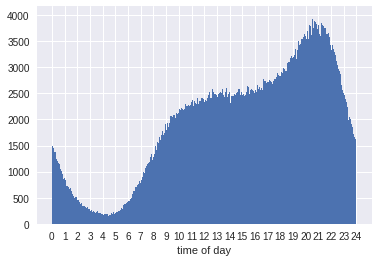

In [151]:
plt.hist(minutes, bins=24*60)
plt.xticks(np.linspace(0,24*60,25), range(0,25))
plt.xlabel('time of day')

In [175]:
df.device.unique()

array(['desktop com', 'iOS', 'mobile com', 'desktop us', 'Android',
       'mobile fr', 'desktop fr', 'desktop au', nan, 'mobile us',
       'desktop es', 'Desktop COM', 'desktop de', 'mobile de', 'mobile es',
       'mobile au', 'desktop it', 'desktop ru', 'mobile ru', 'mobile it',
       'Desktop US', 'Desktop FR', 'Desktop RU', 'Desktop DE',
       'tesktop com', 'Desktop ES', 'Desktop IT'], dtype=object)

In [176]:
def unifyBrowsers(df):
    df.loc[df.device.isnull(), 'device'] = 'unknown'
    df.loc[df.device.str.contains('desktop', case=False), 'device'] = 'desktop'
    df.loc[df.device.str.contains('tesktop', case=False), 'device'] = 'desktop'
    df.loc[df.device.str.contains('mobile', case=False), 'device'] = 'mobile'
    df.loc[df.device.str.contains('android', case=False), 'device'] = 'android'
    df.loc[df.device.str.contains('ios', case=False), 'device'] = 'ios'
    return df

In [169]:
datesNull = pd.DatetimeIndex(df[df.device.in()].startTimeD).date

KeyboardInterrupt: 